In [332]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [333]:
#Load the data
titanic = pd.read_csv('Desktop\\train.csv')
titanic_test = pd.read_csv('Desktop\\test.csv')
#Print the first 10 rows of data
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [305]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 12)

In [306]:
titanic_test.shape

(418, 11)

In [307]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [309]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [290]:
#Get a count of the number of survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

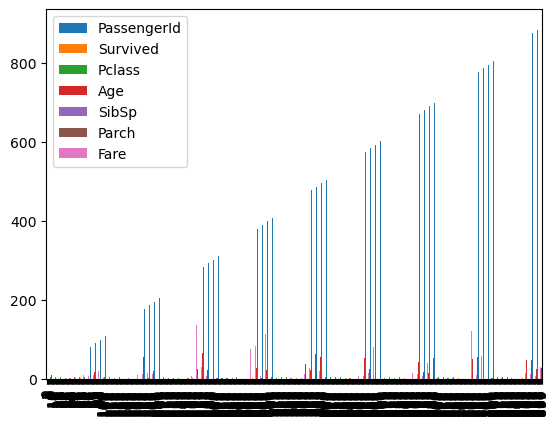

In [202]:
#Visualize the count of number of survivors
titanic.plot(kind="bar")
plt.show()

<Axes: >

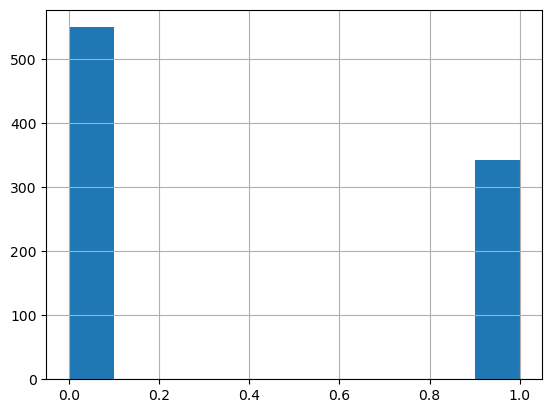

In [203]:
titanic["Survived"].hist()

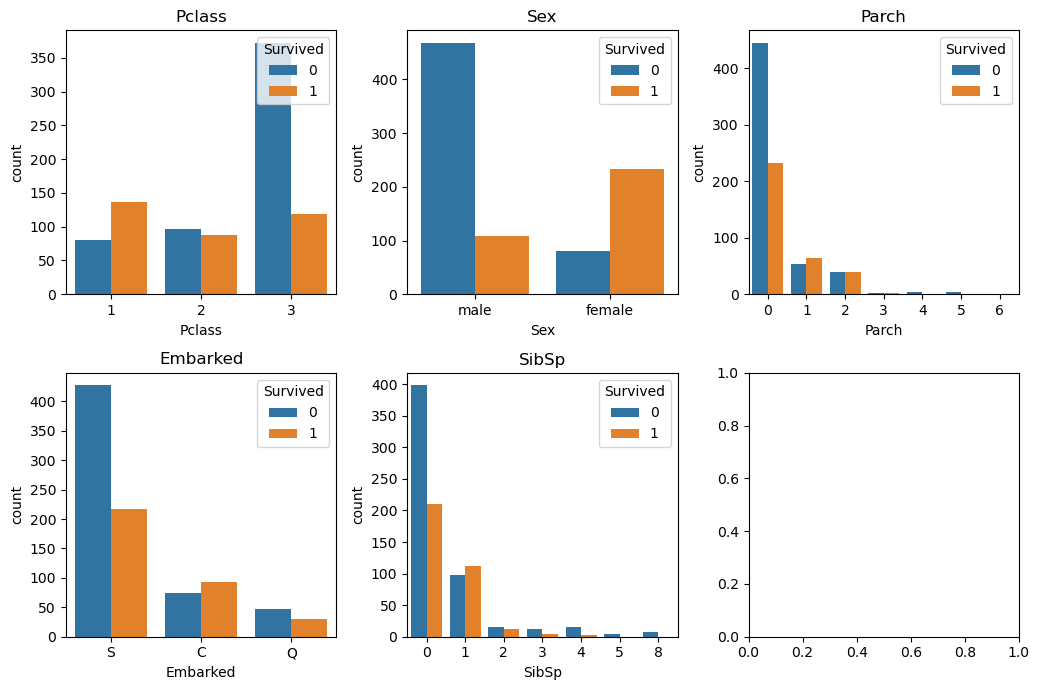

In [204]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = [ 'Pclass', 'Sex', 'Parch', 'Embarked','SibSp']

n_rows = 2
n_cols =3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))
count=0
for r in range(0,n_rows):
    for c in range(0,n_cols):  
        if r==1 and c==2:
            break
        i = count #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x=cols[i], hue="Survived",data=titanic ,ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        count=count+1
plt.tight_layout()   #tight_layout

In [205]:
titanic.groupby("Sex")["Survived"].agg(np.mean)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [206]:
titanic.pivot_table(values="Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Sex'>

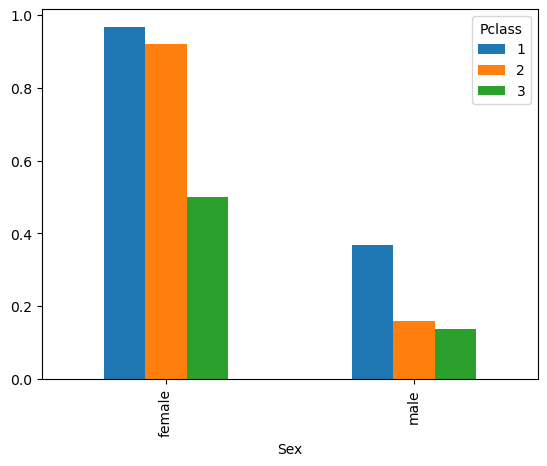

In [207]:
titanic.pivot_table(values="Survived",index="Sex",columns="Pclass").plot(kind="bar")

In [208]:
titanic.pivot_table(values="Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [334]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [335]:
titanic = titanic.drop(['Cabin'], axis=1)

In [336]:
titanic=titanic.dropna()

In [337]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())

In [338]:
titanic_test = titanic_test.drop(['Cabin'], axis=1)

In [339]:
titanic_test=titanic_test.dropna()

In [340]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [341]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [220]:
ages=[]
i=0
# titanic[(titanic["Age"]>0) & (titanic["Age"] <= 18) & (titanic["Sex"]=="female") ] 
while i<891:
    if((titanic["Age"][i] <= 18) ):
        ages.append('[0-18]')
    if((titanic["Age"][i]>18) ):
        ages.append('[18-80]')
    i=i+1
    

In [221]:
titanic.pivot_table(values="Survived",index=["Sex",ages],columns="Pclass")

Pclass                 1         2         3
Sex                                         
female [0-18]   0.909091  1.000000  0.511628
       [18-80]  0.975904  0.903226  0.495050
male   [0-18]   0.800000  0.600000  0.215686
       [18-80]  0.350427  0.086022  0.121622

<Axes: xlabel='Sex,None'>

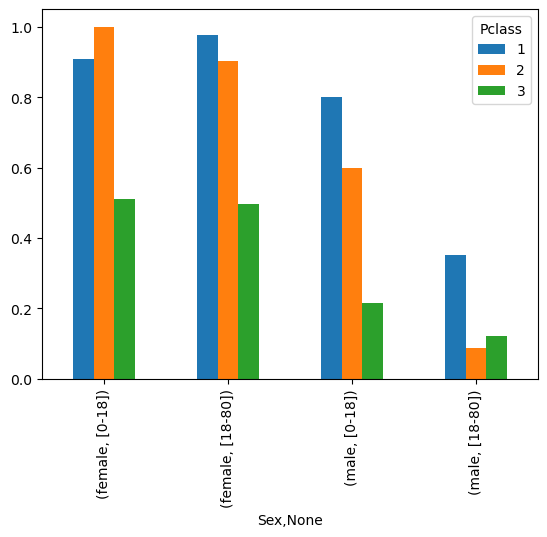

In [222]:
titanic.pivot_table(values="Survived",index=["Sex",ages],columns="Pclass").plot(kind="bar")

In [394]:
titanic.shape

(889, 11)

In [343]:
#Print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [400]:
i=0
while i<=890:
    if i in titanic.index:
        if(titanic['Sex'][i]=="male"):
            titanic['Sex'][i]=int(1)
        if(titanic['Sex'][i]=="female"):
            titanic['Sex'][i]=int(0)
        if(titanic['Embarked'][i]=="S"):
            titanic['Embarked'][i]=int(2)
        if(titanic['Embarked'][i]=="C"):
            titanic['Embarked'][i]=int(0)    
        if(titanic['Embarked'][i]=="Q"):
            titanic['Embarked'][i]=int(1)            
    i=i+1        
        

In [401]:
i=0
while i<=417:
    if i in titanic_test.index:
        if(titanic_test['Sex'][i]=="male"):
            titanic_test['Sex'][i]=int(1)
        if(titanic_test['Sex'][i]=="female"):
            titanic_test['Sex'][i]=int(0)
        if(titanic_test['Embarked'][i]=="S"):
            titanic_test['Embarked'][i]=int(2)
        if(titanic_test['Embarked'][i]=="C"):
            titanic_test['Embarked'][i]=int(0)    
        if(titanic_test['Embarked'][i]=="Q"):
            titanic_test['Embarked'][i]=int(1)            
    i=i+1        
        

In [409]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(titanic,titanic_test,test_size=0.2,random_state=42)
x_train=titanic[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
x_test=titanic_test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y_train=titanic["Survived"]
# y_test=titanic_test["Survived"]

In [410]:
from sklearn.ensemble import RandomForestClassifier
tree =RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
tree.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [413]:
tree.score(x_train,y_train)

0.9572553430821147

In [412]:
tree.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [421]:
tree.predict([[1,0,22,0, 0,0,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)